In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/programming-assignment-linear-regression/ex1data2.txt
/kaggle/input/programming-assignment-linear-regression/ex1data1.csv
/kaggle/input/programming-assignment-linear-regression/ex1data1.txt
/kaggle/input/programming-assignment-linear-regression/ex1data2.csv


<font style='font-size: 15px;'>I'll predict the effect of house size and number of rooms on the house price.</font><br><br>
<font style='font-size: 15px;'>Hypothesis 1: The house price increases with increase in house size. First, I'll only focus on the effect of independent variable house size on the dependent variable house price.</font>

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [55]:
dataset = pd.read_csv('../input/programming-assignment-linear-regression/ex1data2.csv')
X = dataset.iloc[:, [0]].values
y = dataset.iloc[:, -1].values

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [58]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [59]:
y_lin_pred = regressor.predict(X_test)

In [60]:
from sklearn.metrics import r2_score
r2_score(y_test, y_lin_pred)

0.6723239162245208

In [61]:
print(regressor.intercept_)
print(regressor.coef_)

86935.28241026553
[125.10109447]


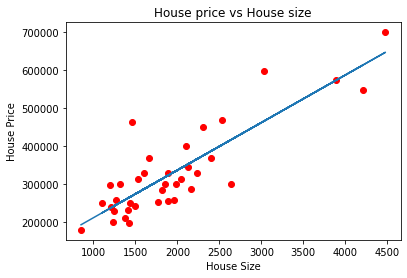

In [62]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train))
plt.title('House price vs House size')
plt.xlabel('House Size')
plt.ylabel('House Price')
plt.show()

<font style='font-size: 15px;'>-> Hypothesis 1 is correct as house price increases with house size.</font><br>
<font style='font-size: 15px;'>-> If the house size increases by 500 sq. units, then the price increases by 125.101 units.</font><br>
<font style='font-size: 15px;'>-> The predicted price of land is 86935.2824 units.</font><br><br>
<font style='font-size: 15px;'>Hypothesis 2: The house price increases with increase in house size and number of bedrooms.</font>

In [63]:
X = dataset.iloc[:, [0, 1]].values
y = dataset.iloc[:, -1].values

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [65]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [66]:
y_lin_pred = regressor.predict(X_test)

In [67]:
from sklearn.metrics import r2_score
r2_score(y_test, y_lin_pred)

0.6745515249932021

In [68]:
print(regressor.intercept_)
print(regressor.coef_)

90561.37024100646
[  125.85346026 -1596.9314267 ]


<font style='font-size: 15px;'>-> Our hypothesis is proved wrong as house price decreases by 1596.931 units when number of bedrooms increases.</font><br>
<font style='font-size: 15px;'>-> So, by this we can predict that when people invest more in houses, they like less bedrooms i.e. they prefer spacious rooms.</font><br>
<font style='font-size: 15px;'>-> But if we compare the coefficients of house size before and after addition of number of bedrooms, there wasn't much change in the coefficient of house size which means that the number of bedrooms is not a confounder i.e. it has negligible influence on the overall prediction.</font><br>
<font style='font-size: 15px;'><b>Only house size has a significant effect on the house price.</b></font>